In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pltgit 
from sklearn.preprocessing import LabelEncoder

In [2]:
df= pd.read_csv(r'C:\Users\Legion\VS_Notebooks\Real-Time_Gesture_Game_Control\data\hand_landmarks_data.csv')
df.head()

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,x19,y19,z19,x20,y20,z20,x21,y21,z21,label
0,262.669968,257.304901,-3.649205e-07,257.417542,247.109055,0.004224,246.882957,241.716827,0.005798,236.384537,...,223.345093,255.490692,-0.020450,215.043365,258.114746,-0.024577,208.006393,259.608673,-0.026722,call
1,83.351778,346.059113,-2.345265e-07,81.925037,328.562347,-0.011102,90.080132,311.535248,-0.021096,95.641823,...,132.451618,341.794434,-0.038175,142.773582,342.829254,-0.037336,152.431698,343.015991,-0.036136,call
2,187.756977,260.235492,-2.417307e-07,195.460579,241.506035,-0.000184,207.259529,223.674339,-0.009687,215.413628,...,250.301010,268.602938,-0.044068,262.425133,271.276638,-0.040469,272.989952,272.272231,-0.038301,call
3,114.976696,331.594238,-1.233261e-07,114.503494,320.549957,-0.002824,116.636627,310.080994,-0.008911,117.685066,...,145.195450,329.357544,-0.027622,151.053200,329.712341,-0.027863,155.990364,329.548828,-0.027723,call
4,188.795288,141.727867,-1.622995e-07,188.520905,127.947464,-0.002884,191.982880,111.010563,-0.008115,192.552521,...,226.696396,132.263248,-0.025113,234.831741,130.684147,-0.024087,241.587769,128.477188,-0.023486,call


In [3]:
df_copy = df.copy()

In [4]:
allowed = ['one', 'two_up', 'three', 'four']

last_col = df_copy.columns[-1]

df_copy = df_copy[df_copy[last_col].isin(allowed)]

In [18]:
# Filter the DataFrame and get unique entries from the 'last_col'
unique_entries = df_copy[last_col].unique()

# Display the unique entries
print(unique_entries)


['four' 'one' 'three' 'two_up']


In [5]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5696 entries, 3746 to 24303
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      5696 non-null   float64
 1   y1      5696 non-null   float64
 2   z1      5696 non-null   float64
 3   x2      5696 non-null   float64
 4   y2      5696 non-null   float64
 5   z2      5696 non-null   float64
 6   x3      5696 non-null   float64
 7   y3      5696 non-null   float64
 8   z3      5696 non-null   float64
 9   x4      5696 non-null   float64
 10  y4      5696 non-null   float64
 11  z4      5696 non-null   float64
 12  x5      5696 non-null   float64
 13  y5      5696 non-null   float64
 14  z5      5696 non-null   float64
 15  x6      5696 non-null   float64
 16  y6      5696 non-null   float64
 17  z6      5696 non-null   float64
 18  x7      5696 non-null   float64
 19  y7      5696 non-null   float64
 20  z7      5696 non-null   float64
 21  x8      5696 non-null   float64
 22  y

In [6]:
df_copy.isna()

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,x19,y19,z19,x20,y20,z20,x21,y21,z21,label
3746,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3747,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3748,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3749,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3750,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24299,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
24300,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
24301,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
24302,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
#drop Z
columns_to_drop = df_copy.columns[2::3]
df_copy = df_copy.drop(columns=columns_to_drop)

In [8]:
df_shuffled = df_copy.sample(frac=1, random_state=42).reset_index(drop=True)
X = df_shuffled.drop(df_shuffled.columns[-1], axis=1)
y = df_shuffled[df_shuffled.columns[-1]]

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify= y)

In [10]:
def wrist_relative_scaling(landmarks):
    landmarks = np.array(landmarks).copy()
    
    if landmarks.ndim == 2: 
        landmarks = landmarks.reshape(-1, 21, 2)
    elif landmarks.ndim == 3:  
        pass
    else:
        raise ValueError("Input must be 2D (N,42) or 3D (N,21,2)")
    
    wrist = landmarks[:, 0, :] 
    middle_tip = landmarks[:, 12, :]
    
    # Compute scale
    scale = np.linalg.norm(middle_tip - wrist, axis=1, keepdims=True)
    scale[scale == 0] = 1  # Avoid division by zero
    
    # Normalize landmarks: (landmarks - wrist) / scale
    landmarks = (landmarks - wrist[:, np.newaxis, :]) / scale[:, np.newaxis, :]
    
    # Flatten
    return landmarks.reshape(landmarks.shape[0], -1)

In [11]:
from sklearn.preprocessing import LabelEncoder

# Print original shapes
print("X_train original shape:", X_train.shape)
print("X_test original shape:", X_test.shape)

# Apply scaling
X_scaled = wrist_relative_scaling(X_train)
X_test_scaled = wrist_relative_scaling(X_test)

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Print shape to verify
print("X_scaled shape:", X_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)
print("y_encoded shape:", y_encoded.shape)
print("y_test_encoded shape:", y_test_encoded.shape)

X_train original shape: (4556, 42)
X_test original shape: (1140, 42)
X_scaled shape: (4556, 42)
X_test_scaled shape: (1140, 42)
y_encoded shape: (4556,)
y_test_encoded shape: (1140,)


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
import joblib

# Train the model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
preds_logreg = logreg.predict(X_test)

# Evaluate
acc = accuracy_score(y_test, preds_logreg)
f1 = f1_score(y_test, preds_logreg, average='macro')

# Save model locally (optional)
joblib.dump(logreg, "logreg_model.pkl")

['logreg_model.pkl']

In [14]:
import warnings
warnings.filterwarnings("ignore")
import optuna
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

def objective(trial):
    param = {
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
        'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 1.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 10.0),
        'objective': 'multi:softmax',
        'num_class': len(set(y_encoded)),
        'eval_metric': 'merror',
    }

    model = xgb.XGBClassifier(**param)

    model.fit(
        X_scaled, y_encoded,
        eval_set=[(X_test_scaled, y_test_encoded)],
        verbose=False,
    )

    preds = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test_encoded, preds)
    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

print("Best trial:")
trial = study.best_trial
print(f"  Accuracy: {trial.value}")
print("  Params:")
for key, value in trial.params.items():
    print(f"    {key}: {value}")


[I 2025-05-27 12:52:17,962] A new study created in memory with name: no-name-ef85d7ee-d5e7-402b-ba5f-397acb26a19a
[I 2025-05-27 12:52:21,542] Trial 0 finished with value: 0.9885964912280701 and parameters: {'max_depth': 5, 'learning_rate': 0.02347929112882683, 'n_estimators': 221, 'min_child_weight': 4, 'gamma': 3.448716806342439e-07, 'subsample': 0.9896647450787416, 'colsample_bytree': 0.5507880468039741, 'reg_alpha': 0.00010189560918286581, 'reg_lambda': 5.6936970783903866e-08}. Best is trial 0 with value: 0.9885964912280701.
[I 2025-05-27 12:52:24,443] Trial 1 finished with value: 0.9859649122807017 and parameters: {'max_depth': 6, 'learning_rate': 0.013668361451516894, 'n_estimators': 198, 'min_child_weight': 9, 'gamma': 0.0002281227154025482, 'subsample': 0.7252294358069771, 'colsample_bytree': 0.7902486256249093, 'reg_alpha': 0.007692337209108348, 'reg_lambda': 2.1103619646462953e-08}. Best is trial 0 with value: 0.9885964912280701.
[I 2025-05-27 12:52:27,587] Trial 2 finished wi

Best trial:
  Accuracy: 0.9921052631578947
  Params:
    max_depth: 5
    learning_rate: 0.19312869002347113
    n_estimators: 216
    min_child_weight: 5
    gamma: 0.0024777732300389466
    subsample: 0.8817840460475469
    colsample_bytree: 0.631892676475247
    reg_alpha: 2.010293316621458e-06
    reg_lambda: 0.019075593180159976


In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

best_model = xgb.XGBClassifier(**trial.params)

best_model.fit(X_scaled, y_encoded)
XGB_pred = best_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test_encoded, XGB_pred)
precision = precision_score(y_test_encoded, XGB_pred, average='weighted')
recall = recall_score(y_test_encoded, XGB_pred, average='weighted')
f1 = f1_score(y_test_encoded, XGB_pred, average='weighted')

print(
    f"""XGBoost Metrics: "
    "Accuracy = {accuracy}, 
    "Precision = {precision}, 
    "Recall = {recall}, 
    "F1 = {f1}"""
)

XGBoost Metrics: "
    "Accuracy = 0.9921052631578947, 
    "Precision = 0.9921538147045814, 
    "Recall = 0.9921052631578947, 
    "F1 = 0.9921029373208392


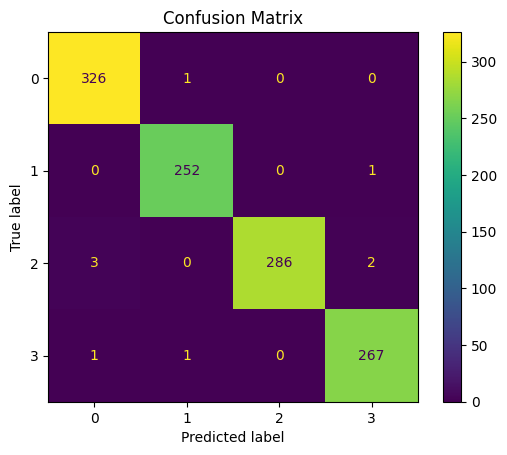

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_predictions(y_test_encoded, XGB_pred)
plt.title("Confusion Matrix")
plt.show()

In [17]:
best_model.save_model("xgboost_model.model")